In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

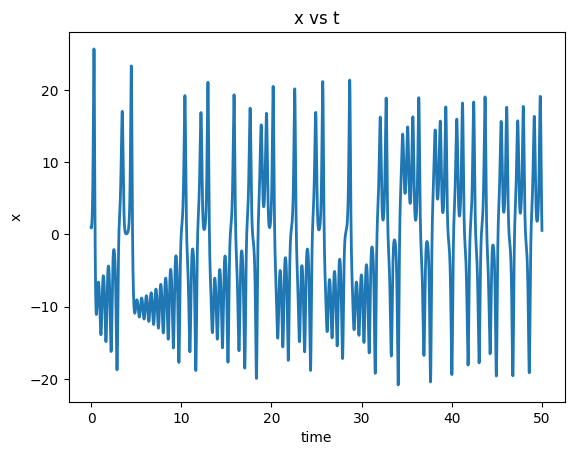

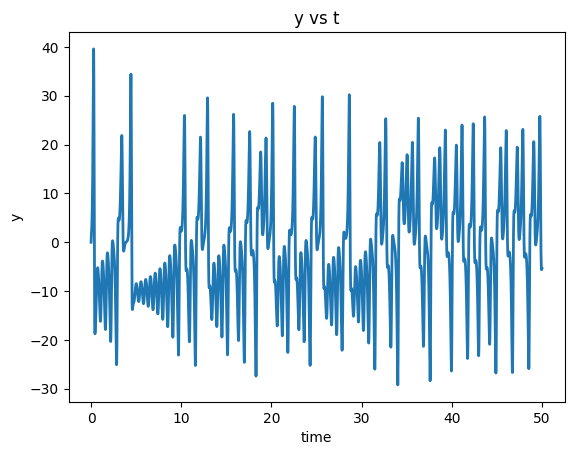

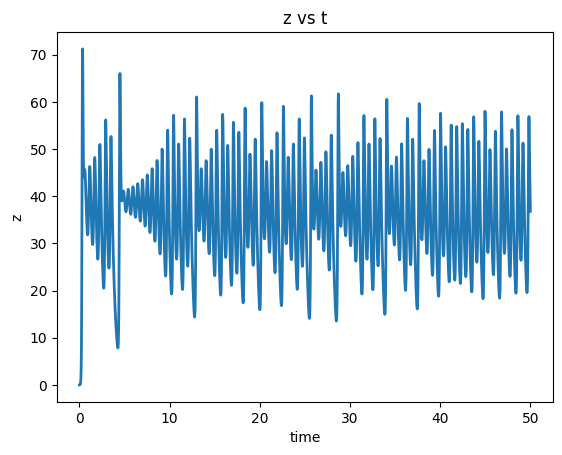

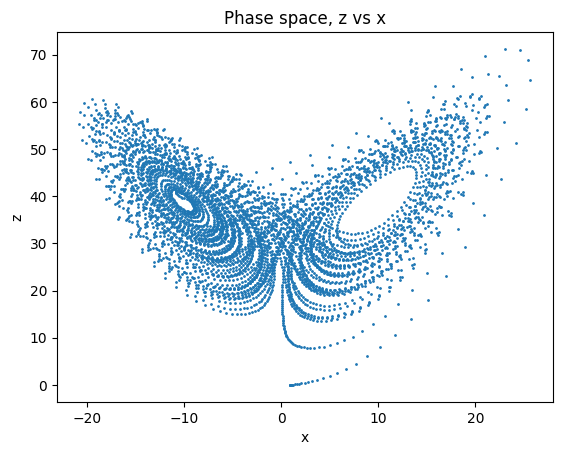

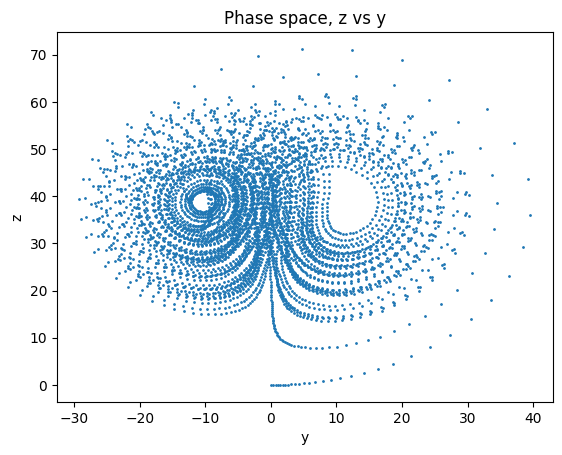

In [4]:
#define initial conditions and constants
r0=np.array([1,0,0],float)
r01=np.array([1,0,0.001])
t0=0
tf=50
sigma=10
rparam=40#change r (5,10,25,40)
b=8/3

def f(r,t):
    x=r[0]
    y=r[1]
    z=r[2]
    fx=sigma*(y-x)
    fy=rparam*x-y-x*z
    fz=x*y-b*z
    return np.array([fx,fy,fz],float)

# choose step size
h=0.01
n=int((tf-t0)/h)

tpoints=np.linspace(t0,tf,n+1)
xpoints=[]
ypoints=[]
zpoints=[]

r=np.copy(r0)
for t in tpoints:
    xpoints.append(r[0])
    ypoints.append(r[1])
    zpoints.append(r[2])
    k1=h*f(r,t)
    k2=h*f(r+k1/2,t+h/2)
    k3=h*f(r+k2/2,t+h/2)
    k4=h*f(r+k3,t+h)
    r += (1/6)*(k1+2*k2+2*k3+k4)

xpoints1=[]
ypoints1=[]
zpoints1=[]

r=np.copy(r01)
for t in tpoints:
    xpoints1.append(r[0])
    ypoints1.append(r[1])
    zpoints1.append(r[2])
    k1=h*f(r,t)
    k2=h*f(r+k1/2,t+h/2)
    k3=h*f(r+k2/2,t+h/2)
    k4=h*f(r+k3,t+h)
    r += (1/6)*(k1+2*k2+2*k3+k4)

plt.figure(1)
plt.plot(tpoints,xpoints,lw=2)
plt.xlabel("time")
plt.ylabel("x")
plt.title("x vs t")

plt.figure(2)
plt.plot(tpoints,ypoints,lw=2)
plt.xlabel("time")
plt.ylabel("y")
plt.title("y vs t")

plt.figure(3)
plt.plot(tpoints,zpoints,lw=2)
plt.xlabel("time")
plt.ylabel("z")
plt.title("z vs t")

plt.figure(4)
plt.plot(xpoints,zpoints,lw=0,marker="o",markersize=1)
plt.xlabel("x")
plt.ylabel("z")
plt.title("Phase space, z vs x")

plt.figure(5)
plt.plot(ypoints,zpoints,lw=0,marker="o",markersize=1)
plt.xlabel("y")
plt.ylabel("z")
plt.title("Phase space, z vs y")



#draw
plt.show()


0.0010000000000000009
0.0010000000000000009


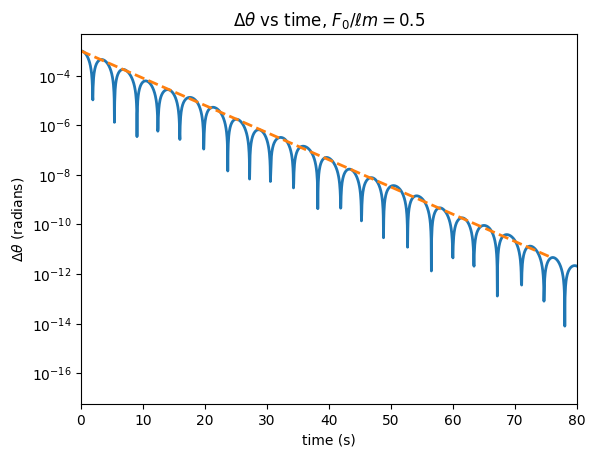

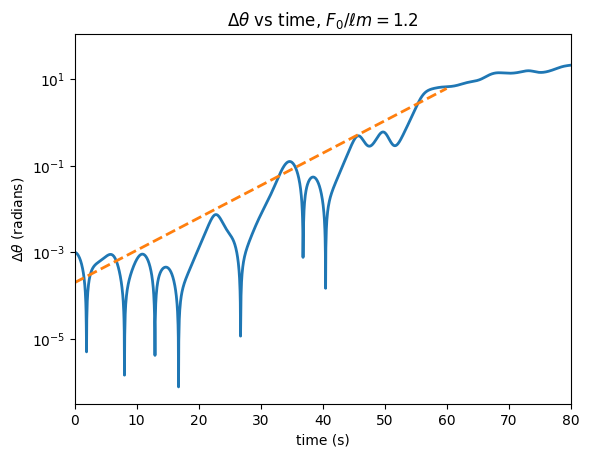

In [3]:
#define initial conditions and constants
theta0=[0.2,0.201]
omega0=0
t0=0
tf=150
l=9.81
g = 9.81
BetaOverM = 0.5
F0overlm = [0.5, 1.2]
kd=2/3
lb=[r'$\Delta \theta$ vs time, $F_0/\ell m = 0.5$',r'$\Delta \theta$ vs time, $F_0/\ell m = 1.2$']

def f(r,t,f0):
    theta=r[0]
    omega=r[1]
    ftheta=omega
    fomega=f0*math.sin(kd*t)-(g/l)*math.sin(theta) - BetaOverM*omega
    return np.array([ftheta,fomega],float)

# choose step size
h=0.04
n=int((tf-t0)/h)

#lines for plots
x1=[0,76]
y1=[1e-3,4.5e-12]
x2=[0,60]
y2=[2e-4,6]

tpoints=np.linspace(t0,tf,n+1)
for j in range(len(F0overlm)):
    thetapoints0=[]
    thetapoints1=[]
    for i in range(len(theta0)):
        r=np.array([theta0[i],omega0],float)
        for t in tpoints:
            if i==0:
                thetapoints0.append(r[0])
            else:
                thetapoints1.append(r[0])
            k1=h*f(r,t,F0overlm[j])
            k2=h*f(r+k1/2,t+h/2,F0overlm[j])
            k3=h*f(r+k2/2,t+h/2,F0overlm[j])
            k4=h*f(r+k3,t+h,F0overlm[j])
            r += (1/6)*(k1+2*k2+2*k3+k4)
    thetadiff=np.zeros(len(thetapoints0))
    for w in range(len(thetapoints0)):
        thetadiff[w]=abs(thetapoints1[w]-thetapoints0[w])
    print(thetadiff[0])
    plt.figure(j+1)
    plt.plot(tpoints,thetadiff,lw=2)
    if j==0:
        plt.plot(x1,y1,lw=2,linestyle="dashed")
    else:
        plt.plot(x2,y2,lw=2,linestyle="dashed")
    plt.xlabel("time (s)")
    plt.ylabel(r'$\Delta \theta$ (radians)')
    plt.title(lb[j])
    plt.xlim(0,80)
    plt.yscale("log")


#draw
plt.show()
